<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# House price prediction using Linear Regression model

###  This is a house price dataset having 1460 observation and 81 different variables. Have to create a linear regression model using the provided predictor variables for the prediction of sale price of houses.

### 1. Import the dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
house = pd.read_csv("https://raw.githubusercontent.com/babukanagaraj/DataScience/master/HousePrice/data/house_data.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 2. Check the shape of the dataset.

In [3]:
house.shape

(1460, 81)

### 3. Finding and replacing 'nulls'

In [4]:
house.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [7]:
## Replacing nulls
house['PoolQC'].fillna('NA',inplace=True)
house['MiscFeature'].fillna('NA',inplace=True)
house['MiscFeature'].fillna('NA',inplace=True)
house['Alley'].fillna('NA',inplace=True)
house['Fence'].fillna('NA',inplace=True)
house['FireplaceQu'].fillna('NA',inplace=True)
house['LotFrontage'].fillna(house['LotFrontage'].mean(),inplace=True)
house['GarageCond'].fillna('NA',inplace=True)
house['GarageType'].fillna('NA',inplace=True)
house['GarageYrBlt'].fillna(house['YearBuilt'],inplace=True)
house['GarageFinish'].fillna('NA',inplace=True)
house['GarageQual'].fillna('NA',inplace=True)
house['BsmtExposure'].fillna('NA',inplace=True)
house.loc[332:332]['BsmtFinType2'].fillna('Unf',inplace=True)
house['BsmtFinType2'].fillna('NA',inplace=True)
house['BsmtFinType1'].fillna('NA',inplace=True)
house['BsmtCond'].fillna('NA',inplace=True)
house['BsmtQual'].fillna('NA',inplace=True)
house['MasVnrArea'].fillna(0,inplace=True)
house['MasVnrType'].fillna('NA',inplace=True)
house['Electrical'].fillna('SBrkr',inplace=True)

C:\Babu\Software\Anaconda\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
house.isnull().sum().sort_values(ascending=False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
LandContour     0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
               ..
ScreenPorch     0
PoolArea        0
PoolQC          0
Fence           0
MiscFeature     0
MiscVal         0
MoSold          0
YrSold          0
SaleType        0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
FullBath        0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
GarageType      0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQua

### 4. Select only numeric columns/features for checking descriptive stats

In [170]:
numeric_cols = house.select_dtypes(include=np.number)
numeric_cols.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [8]:
len(numeric_cols.columns)

38

In [6]:
numeric_cols.iloc[:,1:11].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000


In [7]:
numeric_cols.iloc[:,11:21].describe()

,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877
std,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885
min,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000
25%,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000
50%,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000
75%,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000
max,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000


In [8]:
numeric_cols.iloc[:,21:31].describe()

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.866438,1.046575,6.517808,0.613014,1976.507534,1.767123,472.980137,94.244521,46.660274,21.954110
std,0.815778,0.220338,1.625393,0.644666,26.306739,0.747315,213.804841,125.338794,66.256028,61.119149
min,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,5.000000,0.000000,1959.000000,1.000000,334.500000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,25.000000,0.000000
75%,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000
max,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000


In [9]:
numeric_cols.iloc[:,31:].describe()

,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 5. Finding and removing outliers

In [10]:
##Removing outliers
def remove_outlier(house_temp,col_name_list):
    for col_name in col_name_list:
        Q1 = house_temp[col_name].quantile(0.25)
        Q3 = house_temp[col_name].quantile(0.75)
        IQR = Q3 - Q1
        lowerbound = house_temp[col_name].min()
        upperbound = Q3 + 1.5 * IQR
        print('Column',col_name,'has upperbound -',upperbound,'and lowerbound -',lowerbound)
        house_out = house_temp.loc[(house_temp[col_name] > lowerbound) & (house_temp[col_name] < upperbound)]
    return house_out

In [11]:
##Create a dataframe of house
house_removed_null = house
col_list = ['MSSubClass','LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
           'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF',
           'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice']
house_removed_outlier = remove_outlier(house_removed_null,col_list)

Column MSSubClass has upperbound - 145.0 and lowerbound - 20
Column LotFrontage has upperbound - 107.5 and lowerbound - 21.0
Column LotArea has upperbound - 17673.5 and lowerbound - 1300
Column MasVnrArea has upperbound - 410.625 and lowerbound - 0.0
Column BsmtFinSF1 has upperbound - 1780.625 and lowerbound - 0
Column BsmtFinSF2 has upperbound - 0.0 and lowerbound - 0
Column BsmtUnfSF has upperbound - 1685.5 and lowerbound - 0
Column TotalBsmtSF has upperbound - 2052.0 and lowerbound - 0
Column 1stFlrSF has upperbound - 2155.125 and lowerbound - 334
Column 2ndFlrSF has upperbound - 1820.0 and lowerbound - 0
Column LowQualFinSF has upperbound - 0.0 and lowerbound - 0
Column GrLivArea has upperbound - 2747.625 and lowerbound - 334
Column GarageArea has upperbound - 938.25 and lowerbound - 0
Column WoodDeckSF has upperbound - 420.0 and lowerbound - 0
Column OpenPorchSF has upperbound - 170.0 and lowerbound - 0
Column EnclosedPorch has upperbound - 0.0 and lowerbound - 0
Column 3SsnPorch 

### 6. Drop the irrelevant columns

In [12]:
## Check the correlation of columns
house_corr = house_removed_outlier.corr(method='pearson').abs()
upper = house_corr.where(np.triu(np.ones(house_corr.shape),k=1).astype(np.bool))
upper

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,NaN,0.006447,0.003321,0.015264,0.017139,0.008414,0.009165,0.018295,0.050709,0.000447,...,0.024826,0.007534,0.006404,0.067503,0.008863,0.050712,0.007035,0.024361,0.007377,0.012928
MSSubClass,NaN,NaN,0.362276,0.149866,0.066307,0.070681,0.044883,0.054389,0.046702,0.050389,...,0.000223,0.004343,0.014156,0.047099,0.034763,0.007289,0.009037,0.015398,0.020155,0.061285
LotFrontage,NaN,NaN,NaN,0.313716,0.183118,0.037951,0.090947,0.057601,0.135840,0.197060,...,0.063213,0.122386,0.010276,0.064446,0.037817,0.161753,0.004566,0.015045,0.009636,0.296907
LotArea,NaN,NaN,NaN,NaN,0.070307,0.004295,0.001160,0.012404,0.090517,0.203598,...,0.174695,0.106063,0.009071,0.031632,0.041953,0.098430,0.050512,0.002228,0.030132,0.249839
OverallQual,NaN,NaN,NaN,NaN,NaN,0.071694,0.560332,0.531373,0.323787,0.152282,...,0.192489,0.303426,0.104741,0.028244,0.053124,0.051257,0.026641,0.075352,0.021368,0.783901
OverallCond,NaN,NaN,NaN,NaN,NaN,NaN,0.362733,0.092899,0.116068,0.019659,...,0.005623,0.026914,0.072628,0.031436,0.045126,0.002231,0.068639,0.001079,0.049480,0.048967
YearBuilt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.578269,0.279643,0.212214,...,0.205104,0.188600,0.395571,0.024162,0.046543,0.000601,0.031951,0.011703,0.014587,0.563443
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.126212,0.086805,...,0.187649,0.224481,0.189600,0.039987,0.048606,0.003253,0.007113,0.020944,0.039579,0.539999
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.213319,...,0.105976,0.117047,0.113254,0.015323,0.069678,0.026976,0.026729,0.007270,0.009952,0.350314
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.178359,0.091475,0.102359,0.012005,0.073359,0.127800,0.009400,0.024510,0.013071,0.291221


In [13]:
##Identify the highly co-related colums to drop
drop_col = [column for column in upper.columns if any(upper[column] > 0.8)]
drop_col

['TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']

In [14]:
##Drop the columns - ['TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea']
house_col_dropped = house_removed_outlier.drop(house_removed_outlier[drop_col], axis=1)
house_col_dropped.shape

(1398, 78)

### 7. Feature encoding

In [15]:
##Creating dummies (one hot encoding) for the columns - MSZoning, LotShape, LandContour
house_dummies = pd.get_dummies(house_col_dropped,columns=['MSZoning', 'LotShape','LandContour'],drop_first=True)
house_dummies.head()

,Id,MSSubClass,LotFrontage,LotArea,Street,Alley,Utilities,LotConfig,LandSlope,Neighborhood,...,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl
0,1,60,65.0,8450,Pave,NA,AllPub,Inside,Gtl,CollgCr,...,0,0,1,0,0,0,1,0,0,1
1,2,20,80.0,9600,Pave,NA,AllPub,FR2,Gtl,Veenker,...,0,0,1,0,0,0,1,0,0,1
2,3,60,68.0,11250,Pave,NA,AllPub,Inside,Gtl,CollgCr,...,0,0,1,0,0,0,0,0,0,1
3,4,70,60.0,9550,Pave,NA,AllPub,Corner,Gtl,Crawfor,...,0,0,1,0,0,0,0,0,0,1
4,5,60,84.0,14260,Pave,NA,AllPub,FR2,Gtl,NoRidge,...,0,0,1,0,0,0,0,0,0,1


In [16]:
def label_encode(x):
    return 1 if x == 'Pave' else 0

house_dummies['Street_enc'] = house_dummies['Street'].apply(label_encode)
house_dummies.drop(['Street'],axis=1,inplace=True)

In [17]:
def label_encode(x):
    if x == 'Pave':
        return 2
    elif x == 'Grvl':
        return 1
    else:
        return 0

house_dummies['Alley_enc'] = house_dummies['Alley'].apply(label_encode)
house_dummies.drop(['Alley'],axis=1,inplace=True)

In [18]:
def label_encode(x):
    return 1 if x == 'AllPub' else 0

house_dummies['Utilities_enc'] = house_dummies['Utilities'].apply(label_encode)
house_dummies.drop(['Utilities'],axis=1,inplace=True)

In [19]:
def label_encode(x):
    return 1 if (x == 'CulDSac' or x == 'FR3') else 0

house_dummies['LotConfig_enc'] = house_dummies['LotConfig'].apply(label_encode)
house_dummies.drop(['LotConfig'],axis=1,inplace=True)

In [20]:
def label_encode(x):
    return 1 if (x == 'Mod' or x == 'Sev') else 0

house_dummies['LandSlope_enc'] = house_dummies['LandSlope'].apply(label_encode)
house_dummies.drop(['LandSlope'],axis=1,inplace=True)

In [21]:
def label_encode(x):
    return 1 if (x == 'TwnhsE' or x == '1Fam') else 0

house_dummies['BldgType_enc'] = house_dummies['BldgType'].apply(label_encode)
house_dummies.drop(['BldgType'],axis=1,inplace=True)

In [22]:
def label_encode(x):
    return 1 if x == 'Shed' else 0

house_dummies['RoofStyle_enc'] = house_dummies['RoofStyle'].apply(label_encode)
house_dummies.drop(['RoofStyle'],axis=1,inplace=True)

In [23]:
def label_encode(x):
    return 1 if x == 'GLQ' else 0

house_dummies['BsmtFinType1_enc'] = house_dummies['BsmtFinType1'].apply(label_encode)
house_dummies.drop(['BsmtFinType1'],axis=1,inplace=True)

In [24]:
def label_encode(x):
    return 1 if x == 'GLQ' else 0

house_dummies['BsmtFinType2_enc'] = house_dummies['BsmtFinType2'].apply(label_encode)
house_dummies.drop(['BsmtFinType2'],axis=1,inplace=True)

In [25]:
def label_encode(x):
    if x == 'GasA':
        return 2
    elif (x == 'GasW' or x == 'OthW'):
        return 1
    else:
        return 0

house_dummies['Heating_enc'] = house_dummies['Heating'].apply(label_encode)
house_dummies.drop(['Heating'],axis=1,inplace=True)

In [26]:
def label_encode(x):
    return 1 if x == 'Y' else 0

house_dummies['CentralAir_enc'] = house_dummies['CentralAir'].apply(label_encode)
house_dummies.drop(['CentralAir'],axis=1,inplace=True)

In [27]:
def label_encode(x):
    if x == 'SBrkr':
        return 2
    elif (x == 'FuseA' or x == 'FuseF'):
        return 1
    else:
        return 0

house_dummies['Electrical_enc'] = house_dummies['Electrical'].apply(label_encode)
house_dummies.drop(['Electrical'],axis=1,inplace=True)

In [28]:
def label_encode(x):
    if x == 'Typ':
        return 2
    elif x == 'Maj2':
        return 0
    else:
        return 1

house_dummies['Functional_enc'] = house_dummies['Functional'].apply(label_encode)
house_dummies.drop(['Functional'],axis=1,inplace=True)

In [29]:
def label_encode(x):
    if x == 'Fin':
        return 3
    elif x == 'RFn':
        return 2
    elif x == 'Unf':
        return 1
    else:
        return 0

house_dummies['GarageFinish_enc'] = house_dummies['GarageFinish'].apply(label_encode)
house_dummies.drop(['GarageFinish'],axis=1,inplace=True)

In [30]:
def label_encode(x):
    if x == 'Y':
        return 2
    elif x == 'P':
        return 1
    else:
        return 0

house_dummies['PavedDrive_enc'] = house_dummies['PavedDrive'].apply(label_encode)
house_dummies.drop(['PavedDrive'],axis=1,inplace=True)

In [31]:
def label_encode(x):
    if x == 'GdPrv':
        return 2
    elif x == 'NA':
        return 0
    else:
        return 1

house_dummies['Fence_enc'] = house_dummies['Fence'].apply(label_encode)
house_dummies.drop(['Fence'],axis=1,inplace=True)

In [32]:
def label_encode(x):
    return 1 if x == 'TenC' else 0

house_dummies['MiscFeature_enc'] = house_dummies['MiscFeature'].apply(label_encode)
house_dummies.drop(['MiscFeature'],axis=1,inplace=True)

In [33]:
def label_encode(x):
    return 1 if x == 'Partial' else 0

house_dummies['SaleCondition_enc'] = house_dummies['SaleCondition'].apply(label_encode)
house_dummies.drop(['SaleCondition'],axis=1,inplace=True)

In [34]:
def rating_label_encode(x):
    rating = ['NA','Po','Fa','TA','Gd','Ex']
    for r in rating:
        if x == r:
            return rating.index(r)

update_features = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu',
                  'GarageQual','GarageCond','PoolQC']

for f in update_features:
    house_dummies[f + '_enc'] = house_dummies[f].apply(rating_label_encode)
    house_dummies.drop([f],axis=1,inplace=True)

In [35]:
def rating_label_encode(x):
    rating = ['NA','No','Mn','Av','Gd']
    for r in rating:
        if x == r:
            return rating.index(r)

update_features = ['BsmtExposure']

for f in update_features:
    house_dummies[f + '_enc'] = house_dummies[f].apply(rating_label_encode)
    house_dummies.drop([f],axis=1,inplace=True)

In [36]:
house_dummies_1 = house_dummies.copy(deep=True)
features = ['Neighborhood','Condition1','Condition2','HouseStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
           'Foundation','GarageType','SaleType']

for col in features:
    data = house_dummies.groupby(col)['SalePrice'].median().sort_values()
    q1 = data.quantile(0.25)
    q2 = data.quantile(0.50)
    q3 = data.quantile(0.75)
    for i in range(len(data)):        
        nameIndex = data.index[i]
        nameValue = data[nameIndex]
        if nameValue >= q3 :
            house_dummies_1.loc[(house_dummies_1[col] == nameIndex),[col]] = 3
        elif (nameValue < q3 and nameValue > q2) :
            house_dummies_1.loc[(house_dummies_1[col] == nameIndex),[col]] = 2
        elif (nameValue <= q2 and nameValue > q1) :
            house_dummies_1.loc[(house_dummies_1[col] == nameIndex),[col]] = 1
        else:
            house_dummies_1.loc[(house_dummies_1[col] == nameIndex),[col]] = 0
            

In [37]:
house_dummies_1.head()

,Id,MSSubClass,LotFrontage,LotArea,Neighborhood,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,...,ExterCond_enc,BsmtQual_enc,BsmtCond_enc,HeatingQC_enc,KitchenQual_enc,FireplaceQu_enc,GarageQual_enc,GarageCond_enc,PoolQC_enc,BsmtExposure_enc
0,1,60,65.0,8450,2,1,2,3,7,5,...,3,4,3,5,4,0,3,3,0,1
1,2,20,80.0,9600,3,0,2,2,6,8,...,3,4,3,5,3,3,3,3,0,4
2,3,60,68.0,11250,2,1,2,3,7,5,...,3,4,3,5,4,3,3,3,0,2
3,4,70,60.0,9550,2,1,2,3,7,5,...,3,3,4,4,4,4,3,3,0,1
4,5,60,84.0,14260,3,1,2,3,8,5,...,3,4,3,5,4,3,3,3,0,3


In [201]:
house_dummies_1.dtypes

Id                     int64
MSSubClass             int64
LotFrontage          float64
LotArea                int64
Neighborhood           int64
Condition1             int64
Condition2             int64
HouseStyle             int64
OverallQual            int64
OverallCond            int64
YearBuilt              int64
YearRemodAdd           int64
RoofMatl               int64
Exterior1st            int64
Exterior2nd            int64
MasVnrType             int64
MasVnrArea           float64
Foundation             int64
BsmtFinSF1             int64
BsmtFinSF2             int64
BsmtUnfSF              int64
TotalBsmtSF            int64
1stFlrSF               int64
2ndFlrSF               int64
LowQualFinSF           int64
GrLivArea              int64
BsmtFullBath           int64
BsmtHalfBath           int64
FullBath               int64
HalfBath               int64
                      ...   
LandContour_Lvl        uint8
Street_enc             int64
Alley_enc              int64
Utilities_enc 

### 8. Plot the sale price to check the distribution

The skewness of Sale Price is 0.6869960296323642


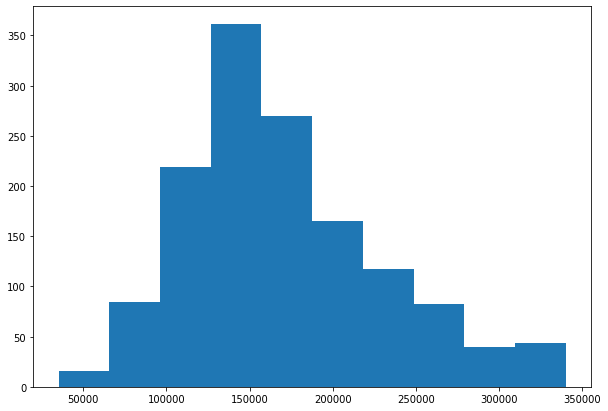

In [38]:
print('The skewness of Sale Price is',house_dummies_1['SalePrice'].skew())
plt.figure(figsize=(10,7))
plt.hist(house_dummies_1['SalePrice'])
plt.show()

The skewness of SalePrice post transformation is -0.29099184718245086


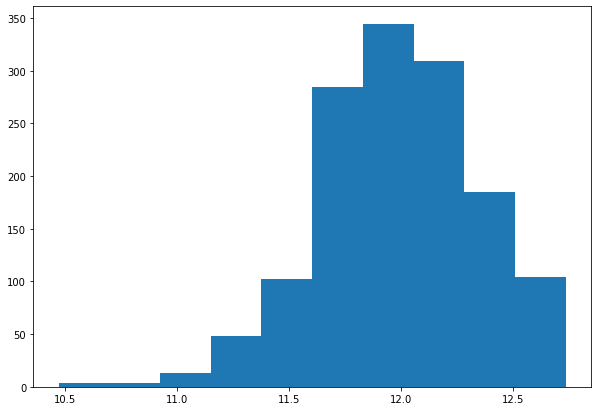

In [39]:
## Transform the target variable saleprice
house_final = house_dummies_1.copy(deep=True)
y = np.log(house_final['SalePrice'])
print('The skewness of SalePrice post transformation is',y.skew())
plt.figure(figsize=(10,7))
plt.hist(y)
plt.show()

In [40]:
### Extract the independent variables
X = house_final.drop(['Id','SalePrice'],axis=1)

In [41]:
X.shape

(1398, 83)

In [42]:
y.shape

(1398,)

### 9. Split the value of X and y into train and test datasets

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,test_size=.20)

In [61]:
## Shape of X and y train dataset
print(X_train.shape)
print(y_train.shape)

(1118, 83)
(1118,)


In [62]:
## Shape of X and y test dataset
print(X_test.shape)
print(y_test.shape)

(280, 83)
(280,)


### 10. Build the model

In [63]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
# print the linreg.intercet
print('Intercept : ', linreg.intercept_)
# print the linreg.coefficient
print('Co-efficient : ', linreg.coef_)

Intercept :  6.875276213378816
Co-efficient :  [-4.55382690e-04  5.71529251e-04  3.62352510e-07  6.07092847e-02
  1.56645983e-02  3.50316468e-02 -1.31646335e-02  6.03496966e-02
  3.85252599e-02  9.41432037e-04  6.29986594e-04 -4.27512709e-02
  5.71957456e-03 -1.00514342e-02 -2.92594522e-03 -2.16271458e-05
  7.94192024e-03  1.18906418e-05  1.41207997e-05 -8.05627683e-06
  1.79551786e-05  1.39612005e-04  8.16318413e-05 -1.28387255e-04
  9.28565990e-05  5.37019337e-02  2.25844346e-04  2.66596398e-02
  2.06676375e-02  1.52158548e-02 -1.95026150e-02  3.69993182e-02
 -6.35167382e-03  5.09290641e-02  7.25931947e-05  4.45315291e-05
  1.69532688e-04  3.15435443e-06  3.20889257e-04  7.04332875e-03
 -4.91858693e-06  5.70555827e-04  2.98040268e-05  3.35890187e-02
  4.10271770e-02  9.76312384e-02  6.22790834e-02  2.45139326e-02
  1.36691793e-02 -6.61982419e-02 -5.15426407e-03  3.77324702e-02
  2.18118231e-02  5.47218041e-02  1.35614554e-01  1.05121287e-02
  1.83186799e-15  3.72534125e-02  3.8220487

In [64]:
### Predict the train value
y_pred_train = linreg.predict(X_train)
pred = pd.DataFrame(y_pred_train)
pred.columns = ['SalePrice']
pred.head()

,SalePrice
0,12.117795
1,11.949785
2,12.153366
3,11.755162
4,12.243165


In [65]:
### Predict the test value
y_pred_test = linreg.predict(X_test)
pred_test = pd.DataFrame(y_pred_test)
pred_test.columns = ['SalePrice']
pred_test.head()

,SalePrice
0,11.955527
1,11.975183
2,12.215800
3,11.457830
4,12.357053


### 11. Model Evaluation

In [66]:
### RMSE for train and test
from sklearn import metrics
RMSE_train = np.sqrt(metrics.mean_absolute_error(y_train,y_pred_train))
RMSE_test = np.sqrt(metrics.mean_absolute_error(y_test,y_pred_test))
# print RMSE for train
print('RMSE for train set is {}'.format(RMSE_train))
# print RMSE for test
print('RMSE for test set is {}'.format(RMSE_test))


RMSE for train set is 0.2926990227009032
RMSE for test set is 0.29917486311611075


In [67]:
### R-Square for train and test
from sklearn.metrics import r2_score

# Calculate r2 for train 
R2_train = r2_score(y_train,y_pred_train)
# Calculate r2 for test 
R2_test = r2_score(y_test,y_pred_test)
# print r2 for train
print('R2 for train set is {}'.format(R2_train))
# print r2 for test
print('R2 for test set is {}'.format(R2_test))

R2 for train set is 0.8811644470078895
R2 for test set is 0.8867073361229324


In [74]:
### Adjusted R2 for both train and test

Adj_R2_train = 1-((1-R2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print(Adj_R2_train)
Adj_R2_test = 1-((1-R2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(Adj_R2_test)

0.8716254229282521
0.838731361113766
